In [1]:
import pandas as pd
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:107: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
data_1km_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/1km_persistance_output.csv", index_col='date')
data_1km_pers.index = pd.to_datetime(data_1km_pers.index, format='%Y-%m-%d')

data_10km_pers = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/10km_persistance_output.csv", index_col='date')
data_10km_pers.index = pd.to_datetime(data_10km_pers.index, format='%Y-%m-%d')

data_10km_pers['IIEE'] = data_10km_pers['IIEE']*100  # Adjust for erronous IIEE implementation

In [4]:
(data_1km_pers['IIEE'] / data_10km_pers['IIEE']).mean()

0.9938082054098228

In [42]:
data_10km_pers['IIEE']

date
2019-01-04    103500
2019-01-09     72700
2019-01-10     74500
2019-01-11    141300
2019-01-16     98100
               ...  
2021-12-22     66800
2021-12-23     80400
2021-12-29     90700
2021-12-30     67800
2021-12-31     67900
Name: IIEE, Length: 434, dtype: int64

In [5]:
data_1km_pers['mean_length'].corr(data_1km_pers['IIEE'])

0.608501787523083

In [6]:
data_10km_pers['mean_length'].corr(data_10km_pers['IIEE'])

0.6695464032550196

In [7]:
data_1km_pers['mean_length'].corr(data_10km_pers['mean_length'])

0.959331499230347

In [8]:
data_1km_pers['IIEE'].corr(data_10km_pers['IIEE'])

0.9995073627445231

In [9]:
(data_1km_pers['IIEE']/data_1km_pers['mean_length']).corr((data_10km_pers['IIEE'] / data_10km_pers['mean_length']))

0.9648018336602502

In [10]:
monthly_mean_lenght_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

normalized_iiee_10km = monthly_mean_IIEE_10km / monthly_mean_lenght_10km

In [11]:
monthly_mean_lenght_1km = data_1km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_1km = data_1km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

normalized_iiee_1km = monthly_mean_IIEE_1km / monthly_mean_lenght_1km

In [12]:
print((monthly_mean_lenght_1km / monthly_mean_lenght_10km).mean())

14.147570512994337


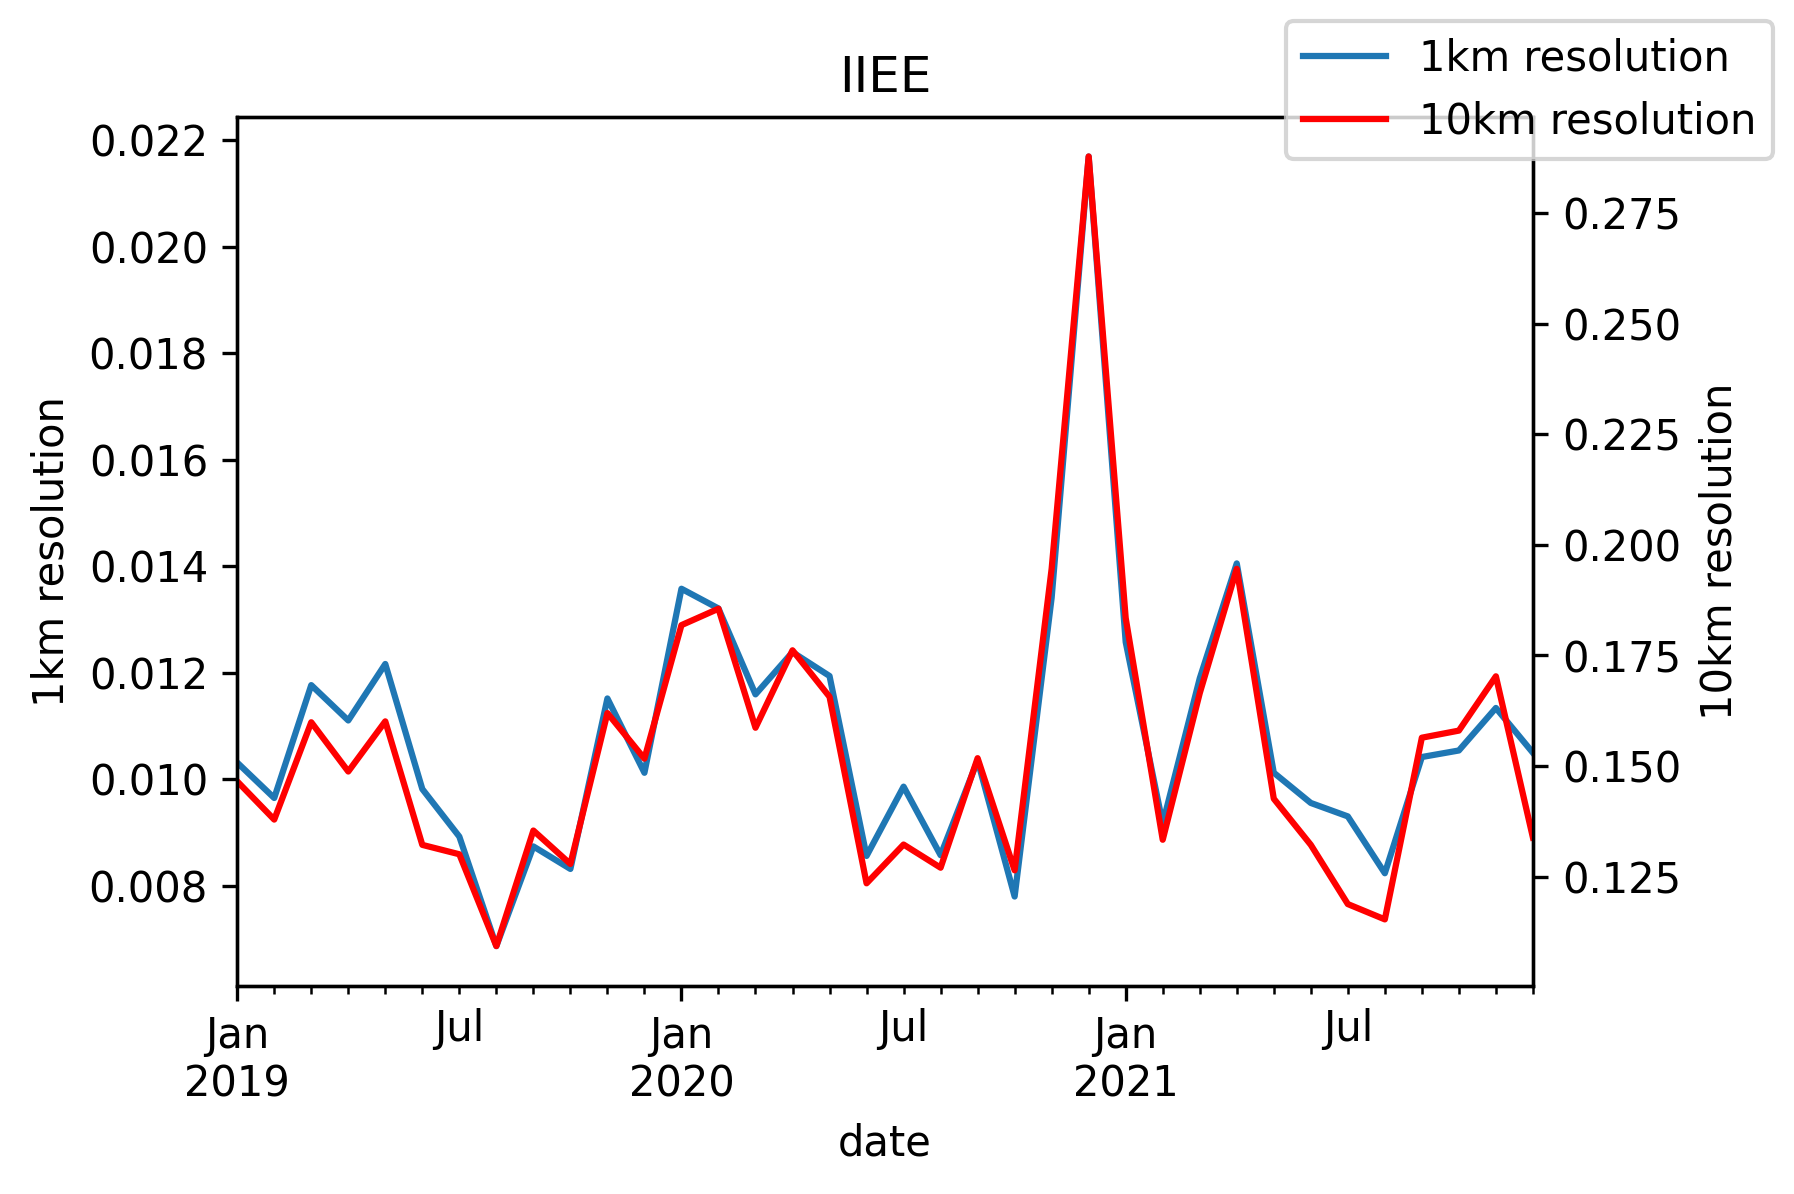

In [13]:
ax = normalized_iiee_1km.plot(label='1km resolution')
ax2 = ax.twinx()
ax.set_title('IIEE')
ax.set_ylabel('1km resolution')
ax2.set_ylabel('10km resolution')
normalized_iiee_10km.plot(ax=ax2, color='red', label="10km resolution")
fig = ax.get_figure()
fig.legend()
plt.tight_layout()
fig.savefig('normalized_iiee.png', bbox_inches=0, transparent=False)

In [14]:
monthly_mean_lenght_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].mean()

monthly_mean_IIEE_10km = data_10km_pers.groupby(pd.Grouper(freq="M"))['IIEE'].mean()

<AxesSubplot:label='3f8506b6-a53a-4e0b-bdfe-2609c659570e', xlabel='date'>

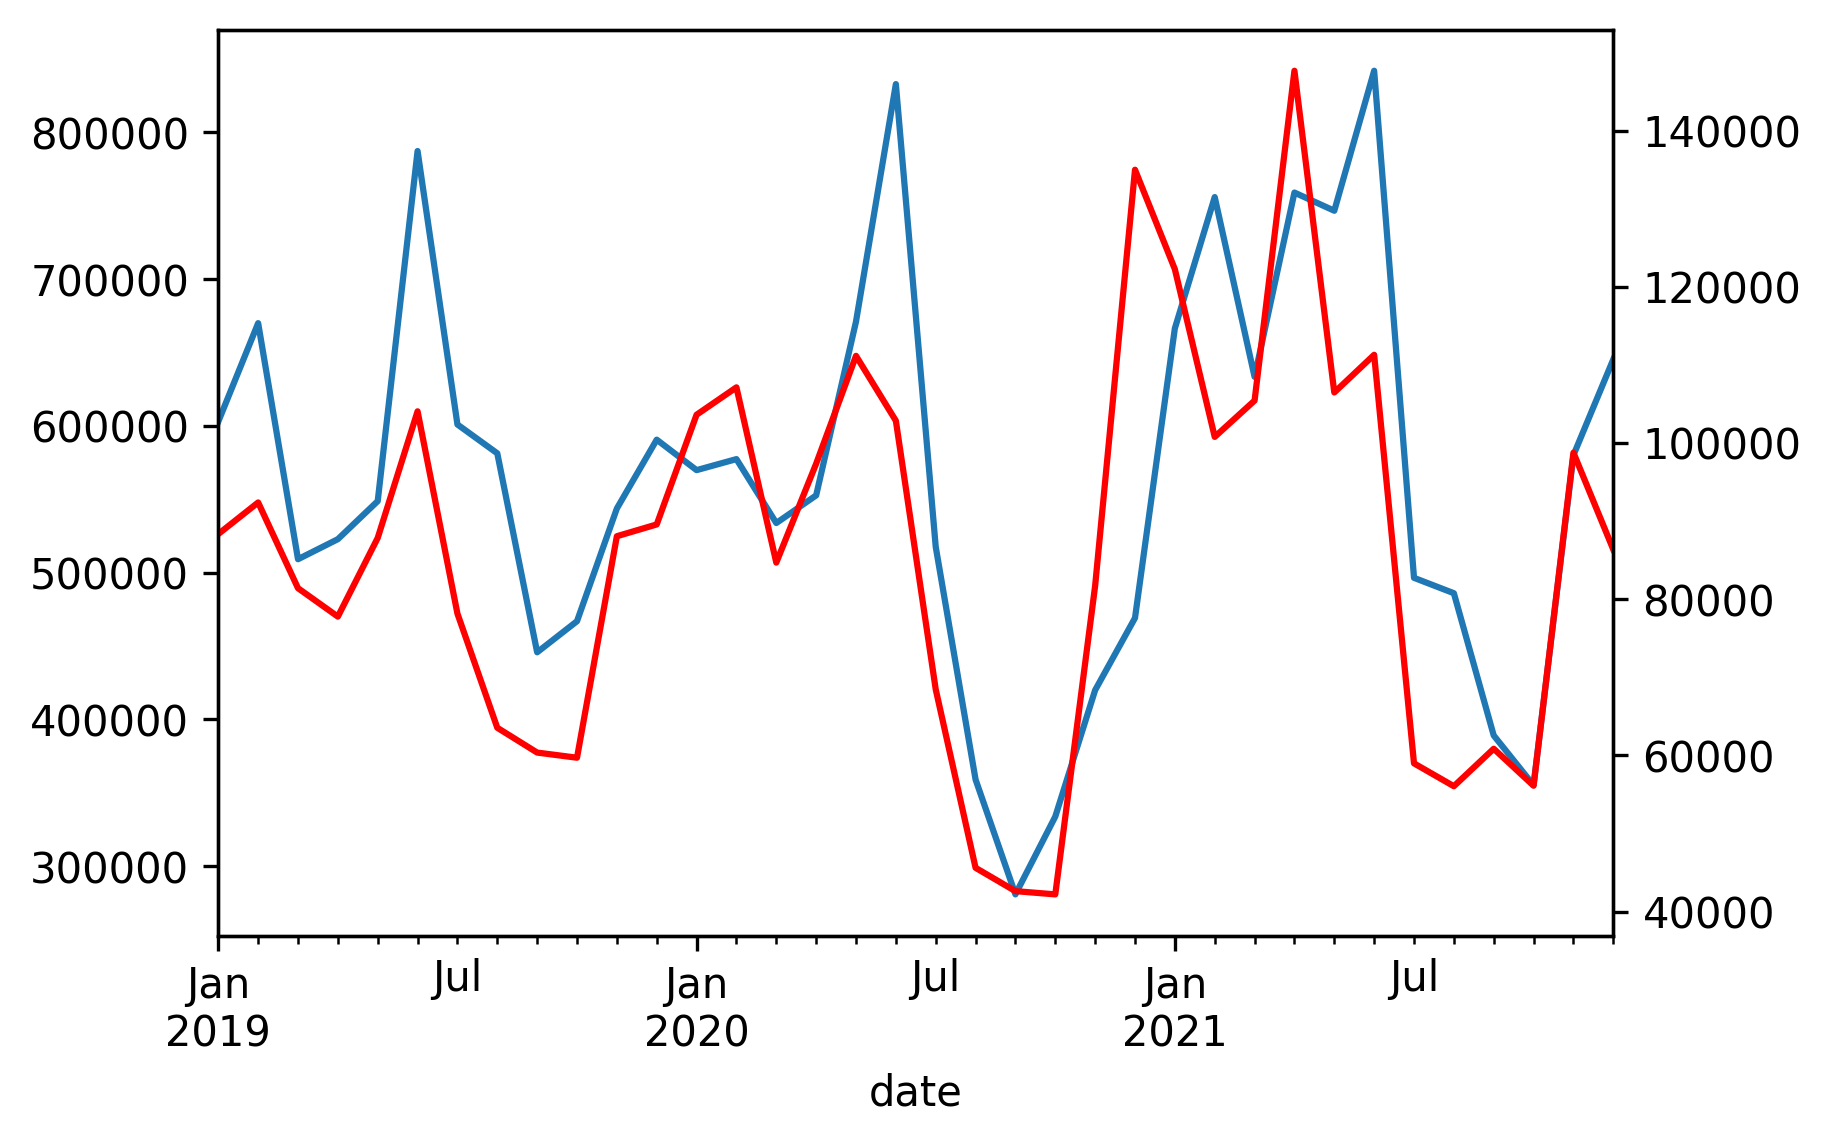

In [15]:
ax = monthly_mean_lenght_10km.plot()
ax2 = ax.twinx()
monthly_mean_IIEE_10km.plot(ax=ax2, color='red')

In [ ]:
# monthly_mean_lenght_pers = data_1km_pers.groupby(pd.PeriodIndex(data_1km_pers.index, freq="M"))['mean_length'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
monthly_mean_lenght_pers = data_1km_pers.groupby(pd.Grouper(freq="M"))['mean_length'].agg(totallow_value='min', high_value='max', mean='mean')
monthly_mean_IIEE_pers = data_1km_pers.groupby(pd.PeriodIndex(data_1km_pers.index, freq="M"))['IIEE'].mean()

In [ ]:
monthly_mean_lenght_pers

In [ ]:
ax = monthly_mean_lenght_pers.plot()
ax2 = ax.twinx()
monthly_mean_IIEE_pers.plot(ax=ax2, color='red')

In [2]:
data_1km = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/1km_output.csv", index_col='date')
data_10km = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/IIEE_IceEdgeLenght_CorrelationStudy/Data/10km_output.csv", index_col='date')

In [3]:
data_10km

,target_length,forecast_length,mean_length,IIEE,a_plus,a_minus
date,,,,,,
2021-01-06,4.943883e+06,4.526862e+06,4.735373e+06,1509,540,969
2021-01-07,5.433086e+06,3.624458e+06,4.528772e+06,1614,632,982
2021-01-08,5.159798e+06,3.681830e+06,4.420814e+06,1730,651,1079
2021-01-13,4.993539e+06,4.233661e+06,4.613600e+06,1414,274,1140
2021-01-14,4.718190e+06,3.932146e+06,4.325168e+06,906,239,667
...,...,...,...,...,...,...
2021-12-22,4.749396e+06,3.539612e+06,4.144504e+06,543,297,246
2021-12-23,4.439030e+06,3.720186e+06,4.079608e+06,738,533,205
2021-12-29,4.888269e+06,3.901277e+06,4.394773e+06,788,409,379


In [4]:
data_1km['mean_length'].corr(data_1km['IIEE'])

0.7062151969687109

In [5]:
data_10km['mean_length'].corr(data_10km['IIEE'])

0.7244512064455325

In [6]:
data_1km['IIEE'].corr(data_10km['IIEE'])

0.9994219254377396

In [7]:
monthly_mean_lenght = data_10km.groupby(pd.PeriodIndex(data_10km.index, freq="M"))['mean_length'].mean()

monthly_mean_IIEE = data_10km.groupby(pd.PeriodIndex(data_10km.index, freq="M"))['IIEE'].mean()

<AxesSubplot:label='fddd46a1-d482-42b8-81ea-788f0a847fb3', xlabel='date'>

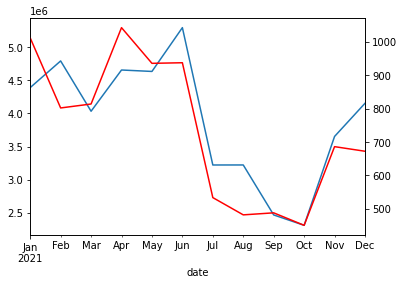

In [8]:
ax = monthly_mean_lenght.plot()
ax2 = ax.twinx()
monthly_mean_IIEE.plot(ax=ax2, color='red')